# Gridded datasets

ERDDAP has a seperate mechanism for gridded data, like satellite and model/reanalysis products. This is called griddap. 

In [1]:
from erddapy import ERDDAP
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cmocean.cm as cmo

### Specify server and protocol

Here we use a Chlorophyll (Gap-filled DINEOF) 9 km dataset from the coastwatch server

https://coastwatch.noaa.gov/erddap/griddap/noaacwNPPN20VIIRSDINEOFDaily.html

In [2]:
e = ERDDAP(
    server="https://coastwatch.noaa.gov/erddap",
    protocol="griddap",
)
e.dataset_id='noaacwNPPN20VIIRSDINEOFDaily'

e.griddap_initialize() # This sends a background request to find the dataset's variables and extent
print(f"variables in this dataset:\n\n{e.variables}")


variables in this dataset:

['chlor_a']


In [3]:
e.variables = ['chlor_a']

In [4]:
ds = e.to_xarray()

In [5]:
ds

<xarray.Dataset>
Dimensions:    (time: 1, altitude: 1, latitude: 2160, longitude: 4320)
Coordinates:
  * time       (time) datetime64[ns] 2024-02-03T12:00:00
  * altitude   (altitude) float64 0.0
  * latitude   (latitude) float32 89.96 89.88 89.79 ... -89.79 -89.88 -89.96
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    chlor_a    (time, altitude, latitude, longitude) float32 ...
Attributes: (12/78)
    _lastModified:                     2024-02-04T21:15:06.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     coastwatch.info@noaa.gov
    creator_name:                      NOAA CoastWatch
    creator_type:                      group
    ...                                ...
    testOutOfDate:                     now-4days
    time_coverage_end:                 2024-02-03T12:00:00Z
    time_coverage_start:               2024-02-03T12:00:00Z
    title:                             Chlorophyll (Gap-filled DINEOF), NOAA ...
    Westernmost_Easting:               -179.95833
    westernmost_longitude:             -180.0

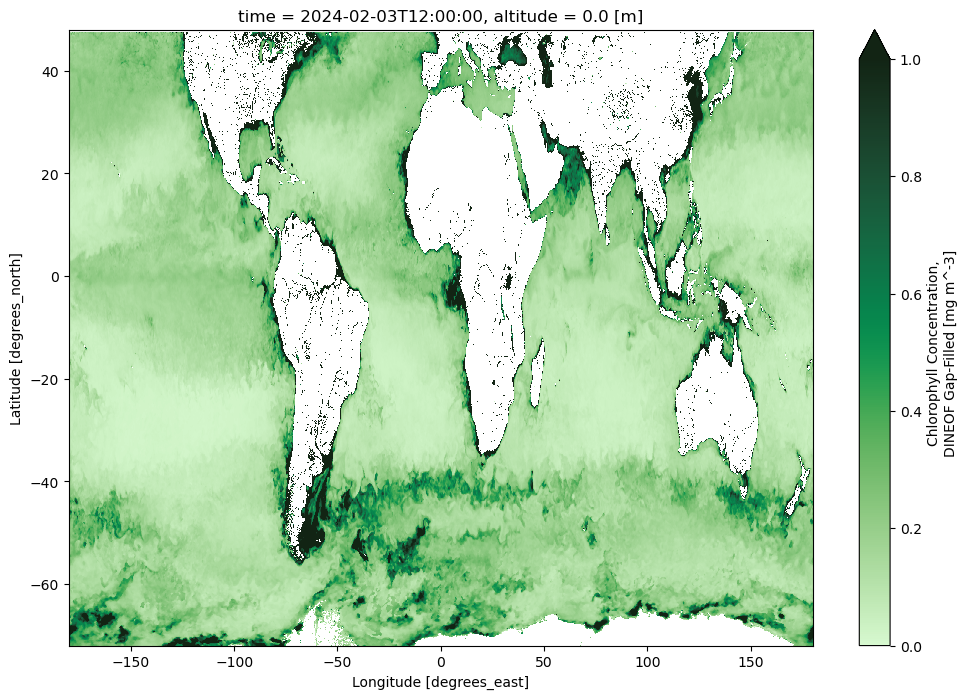

In [6]:
ds.chlor_a.plot(figsize=(12, 8), vmin=0, vmax=1, ylim=(-72, 48), cmap=cmo.algae);

Gridded datasets can be very large. By default, erddapy returns only the most recent time slice of a dataset. This behaviour can be changed by adjusting the constraints, much like with tabledap. The mechanism for subsetting griddap data is a little more complicated, as the data are multi-dimensional.

Let's zoom in on the Gulf Stream and take a few time slices. To achieve this, we modify the constraints. We will tighten the lon/lat to a window of interest and request a wider timespan of data, taking every 30th day over the last few years

In [7]:
e.griddap_initialize()
e.constraints

{'time>=': '2024-02-03T12:00:00Z',
 'time<=': '2024-02-03T12:00:00Z',
 'time_step': 1,
 'altitude>=': 0.0,
 'altitude<=': 0.0,
 'altitude_step': 1,
 'latitude>=': 89.958336,
 'latitude<=': -89.958336,
 'latitude_step': 1,
 'longitude>=': -179.95833,
 'longitude<=': 179.95836,
 'longitude_step': 1}

In [8]:
e.constraints = {'time>=': '2023-01-01',
 'time<=': '2023-05-01',
 'time_step': 30,
 'latitude>=': 25,
 'latitude<=': 45,
 'latitude_step': 1,
 'longitude>=': -90,
 'longitude<=': -30,
 'longitude_step': 1,
  'altitude>=': 0.0,
 'altitude<=': 0.0,
 'altitude_step': 1,}

e.variables=['chlor_a']

ds_gulf = e.to_xarray()

In [9]:
ds_gulf

<xarray.Dataset>
Dimensions:    (time: 4, altitude: 1, latitude: 241, longitude: 720)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-04-06T12:00:00
  * altitude   (altitude) float64 0.0
  * latitude   (latitude) float32 45.04 44.96 44.87 44.79 ... 25.21 25.12 25.04
  * longitude  (longitude) float32 -89.96 -89.88 -89.79 ... -30.21 -30.12 -30.04
Data variables:
    chlor_a    (time, altitude, latitude, longitude) float32 ...
Attributes: (12/78)
    _lastModified:                     2024-02-04T21:15:06.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     coastwatch.info@noaa.gov
    creator_name:                      NOAA CoastWatch
    creator_type:                      group
    ...                                ...
    testOutOfDate:                     now-4days
    time_coverage_end:                 2023-04-06T12:00:00Z
    time_coverage_start:               2023-01-01T12:00:00Z
    title:                             Chlorophyll (Gap-filled DINEOF), NOAA ...
    Westernmost_Easting:               -89.958336
    westernmost_longitude:             -180.0

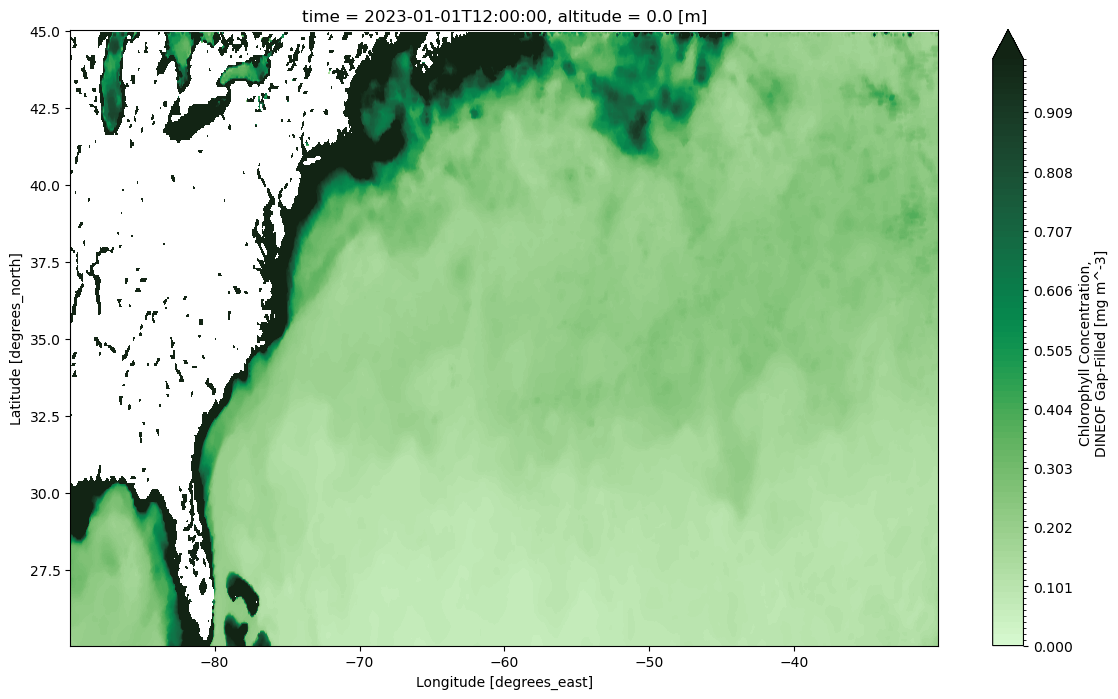

In [10]:
xr.plot.contourf(ds_gulf.sel(time="'2023-01-01", altitude="0", method="nearest").chlor_a, vmin=0, vmax=1, cmap=cmo.algae, levels=100, figsize=(14, 8));

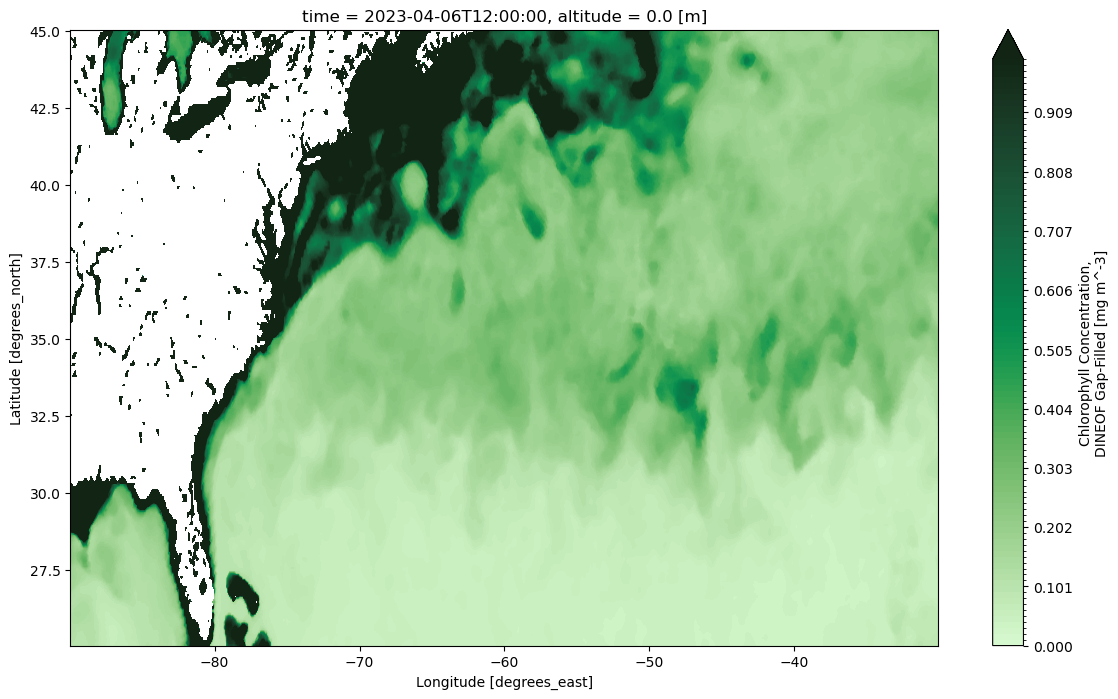

In [11]:
xr.plot.contourf(ds_gulf.sel(time="'2023-05-01", altitude="0", method="nearest").chlor_a, vmin=0, vmax=1, cmap=cmo.algae, levels=100, figsize=(14, 8));

----------------------------

### References

coastwatch ERDDAP https://coastwatch.pfeg.noaa.gov/erddap/index.html

For more information on how erddapy deals with griddap, see the [erddapy documentation example notebook](https://ioos.github.io/erddapy/01a-griddap-output.html)

### extra example: JPL surface temperature

In [12]:


e = ERDDAP(
    server="https://coastwatch.pfeg.noaa.gov/erddap",
    protocol="griddap",
)

e.dataset_id='jplMURSST41'
e.griddap_initialize()

e.variables = ['analysed_sst']

e.constraints = {'time>=': '2023-04-01',
 'time<=': '2023-05-01',
 'time_step': 30,
 'latitude>=': 25,
 'latitude<=': 45,
 'latitude_step': 1,
 'longitude>=': -90,
 'longitude<=': -30,
 'longitude_step': 1}


In [13]:
ds_gulf_sst = e.to_xarray()

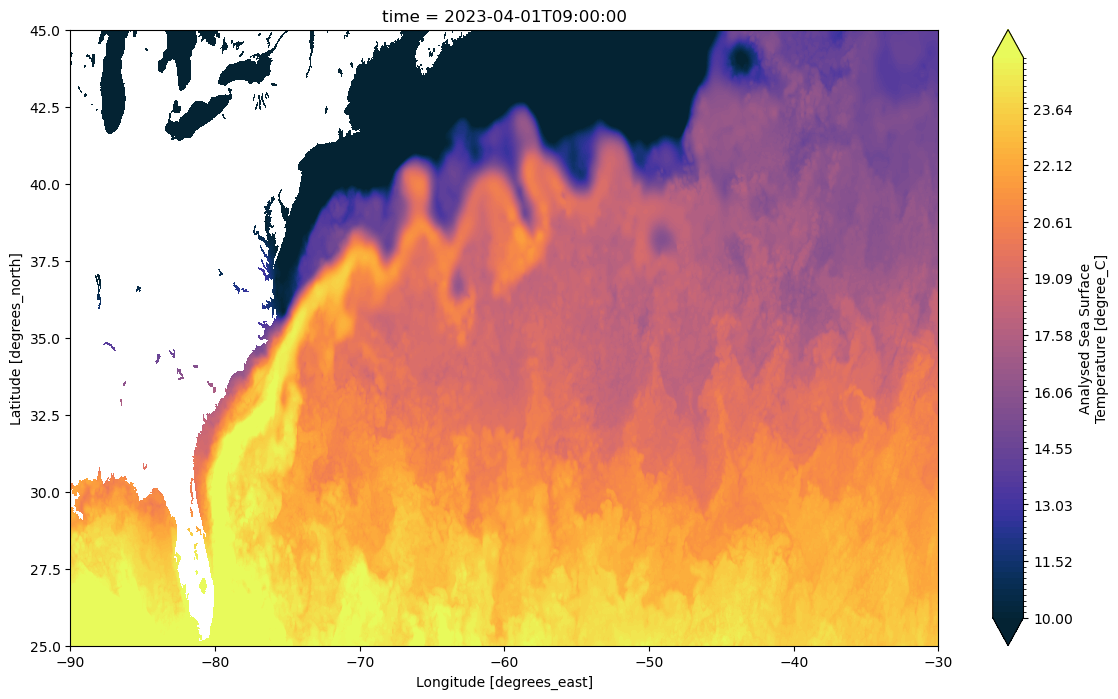

In [14]:
xr.plot.contourf(ds_gulf_sst.sel(time="'2023-04-01", method="nearest").analysed_sst, vmin=10, vmax=25, levels=100, figsize=(14, 8), cmap=cmo.thermal);

### extra example: low-res topography

In [15]:
pacioos = ERDDAP(
    server="https://pae-paha.pacioos.hawaii.edu/erddap",
    protocol="griddap",
)
pacioos.dataset_id = "etopo5_lon180"
pacioos.griddap_initialize()


In [16]:
pacioos.constraints = {
 'latitude>=': 20,
 'latitude<=': 60,
 'latitude_step': 1,
 'longitude>=': -90,
 'longitude<=': -30,
 'longitude_step': 1}
topo = pacioos.to_xarray()


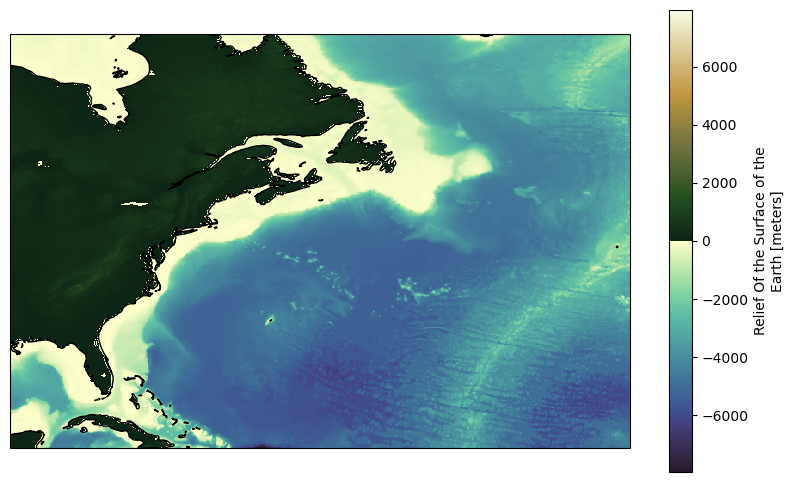

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(10, 6))
topo["ROSE"].plot(ax=ax, cmap=cmo.topo)
ax.coastlines();